# **Laboratorio 4 SIS-420**

Aplicacion de regularización

In [21]:
# Prediccion de polularidad de canciones con regresion lineal multivariable
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:

# el formato de los datos es el siguiente
# song_popularity, song_duration_ms, acousticness, danceability, energy, instrumentalness, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, audio_valence
# leer el archivo de datos
data = pd.read_csv('song_data.csv')

# seleccionar las columnas de interes
data = data[['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
print(data.head())

# Definir las variables dependientes e independientes
X = data[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y = data['song_popularity']
print(X.head())
print(y.head())


   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

In [23]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [24]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833            352280      0.945000         0.488   0.326          0.015700   
18834            193533      0.911000         0.640   0.381          0.000254   

       key  liveness  loudn

In [25]:
# añadir una columna de unos a la matriz X_norm
X = np.concatenate([np.ones((y.size, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.73675732 -0.87637397 ...  1.60156497  0.13694446
  -0.22061046]
 [ 1.         -0.02135038 -0.85981763 ... -0.55085753  0.13694446
  -0.64575064]
 [ 1.          0.22578605 -0.86719525 ...  0.09778769  0.13694446
  -0.83379341]
 ...
 [ 1.         -0.60115248  2.03823368 ...  0.32948899  0.13694446
  -0.9891331 ]
 [ 1.          2.23872896  2.37767318 ... -0.52275247  0.13694446
  -0.8378813 ]
 [ 1.         -0.41209311  2.25990845 ... -1.03028036  0.13694446
   0.21679339]]


In [26]:
# Aplicando regularizacion
def computeCostMultiR(X, y, theta, lambda_):
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    reg_term = np.sum(np.square(theta))  # Término de regularización aumentado (sin excluir theta[0])
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * reg_term
    return J

In [27]:
def gradientDescentMultiR(X, y, theta, alpha, num_iters, lambda_):
    m = y.shape[0] 
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X.T, np.dot(X, theta) - y) + lambda_ * theta)
        J_history.append(computeCostMultiR(X, y, theta, lambda_))
    return theta, J_history


Theta calculado: [52.99184869 -0.30623175 -1.18390681  1.9924086  -2.50883647 -2.2826986
 -0.22638416 -0.64237421  2.68397611  0.10678767 -0.23060131 -0.32339917
  0.4241232  -2.14364041]
Costo calculado: 228.8389422767602


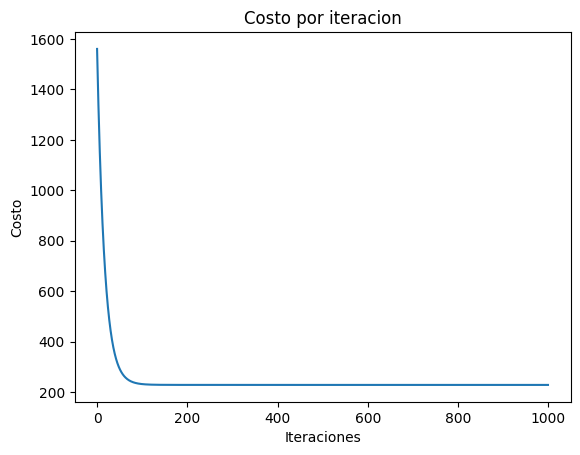

In [28]:
# inicializar theta y ejecutar el algoritmo de regresion lineal
theta = np.zeros(14)
alpha = 0.03
lambda_ = 0.01
num_iteraciones = 1000
theta, J_history = gradientDescentMultiR(X, y, theta, alpha, num_iteraciones, lambda_)

print('Theta calculado:', theta)
print('Costo calculado:', J_history[-1])

# graficar la evolucion del costo
plt.plot(J_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo por iteracion')
plt.show()

Popularidad de la cancion 1: 55.40278072749086
Popularidad de la cancion 2: 48.70795241124624
Popularidad de la cancion 3: 48.42644382267483
Popularidad de la cancion 4: 42.26900471962303
Popularidad de la cancion 5: 36.94850807179505
Popularidad de la cancion 6: 30.525329820414097
Popularidad de la cancion 7: 24.046267436720047
Popularidad de la cancion 8: 19.96675495510721
Popularidad de la cancion 9: 13.487692571413174
Popularidad de la cancion 10: 9.013146745166324


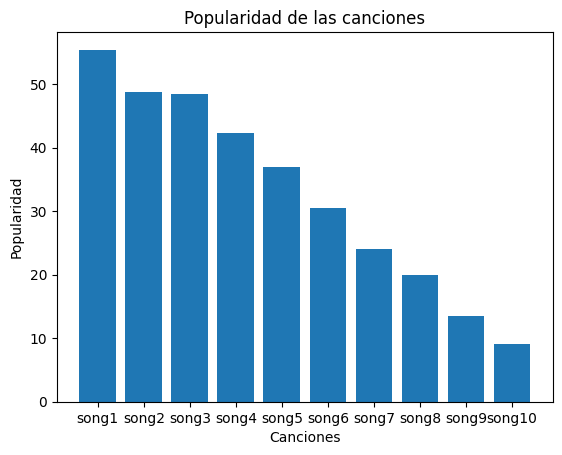

In [29]:
# predecir la popularidad de 10 canciones 
# song_duration_ms, acousticness, danceability, energy, instrumentalness, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, audio_valence
# song 1
song1 = np.array([262333, 0.005520000000000001, 0.496, 0.682, 2.94e-05, 8, 0.0589, -4.095, 1, 0.0294, 167.06, 4, 0.474])
song1 = (song1 - mu) / sigma
song1 = np.hstack((np.ones(1), song1))
popularity1 = np.dot(song1, theta)
print('Popularidad de la cancion 1:', popularity1)

# song 2
song2 = np.array([300000, 0.2, 0.6, 0.5, 0.2, 2, 0.2, -10, 0, 0.2, 130, 3, 0.6])
song2 = (song2 - mu) / sigma
song2 = np.hstack((np.ones(1), song2))
popularity2 = np.dot(song2, theta)
print('Popularidad de la cancion 2:', popularity2)

# song 3
song3 = np.array([400000, 0.3, 0.4, 0.3, 0.3, 3, 0.3, -13, 1, 0.3, 140, 5, 0.4])
song3 = (song3 - mu) / sigma
song3 = np.hstack((np.ones(1), song3))
popularity3 = np.dot(song3, theta)
print('Popularidad de la cancion 3:', popularity3)

# song 4
song4 = np.array([500000, 0.4, 0.2, 0.2, 0.4, 4, 0.4, -16, 0, 0.4, 150, 4, 0.2])
song4 = (song4 - mu) / sigma
song4 = np.hstack((np.ones(1), song4))
popularity4 = np.dot(song4, theta)
print('Popularidad de la cancion 4:', popularity4)

# song 5
song5 = np.array([600000, 0.5, 0.1, 0.1, 0.5, 5, 0.5, -19, 1, 0.5, 160, 3, 0.1])
song5 = (song5 - mu) / sigma
song5 = np.hstack((np.ones(1), song5))
popularity5 = np.dot(song5, theta)
print('Popularidad de la cancion 5:', popularity5)

# song 6
song6 = np.array([700000, 0.6, 0.3, 0.4, 0.6, 6, 0.6, -22, 0, 0.6, 170, 4, 0.3])
song6 = (song6 - mu) / sigma
song6 = np.hstack((np.ones(1), song6))
popularity6 = np.dot(song6, theta)
print('Popularidad de la cancion 6:', popularity6)

# song 7
song7 = np.array([800000, 0.7, 0.5, 0.5, 0.7, 7, 0.7, -25, 1, 0.7, 180, 3, 0.5])
song7 = (song7 - mu) / sigma
song7 = np.hstack((np.ones(1), song7))
popularity7 = np.dot(song7, theta)
print('Popularidad de la cancion 7:', popularity7)

# song 8
song8 = np.array([900000, 0.8, 0.7, 0.6, 0.8, 8, 0.8, -28, 0, 0.8, 190, 4, 0.7])
song8 = (song8 - mu) / sigma
song8 = np.hstack((np.ones(1), song8))
popularity8 = np.dot(song8, theta)
print('Popularidad de la cancion 8:', popularity8)

# song 9
song9 = np.array([1000000, 0.9, 0.9, 0.7, 0.9, 9, 0.9, -31, 1, 0.9, 200, 3, 0.9])
song9 = (song9 - mu) / sigma
song9 = np.hstack((np.ones(1), song9))
popularity9 = np.dot(song9, theta)
print('Popularidad de la cancion 9:', popularity9)

# song 10
song10 = np.array([1100000, 1, 1, 0.8, 1, 10, 1, -34, 0, 1, 210, 4, 1])
song10 = (song10 - mu) / sigma
song10 = np.hstack((np.ones(1), song10))
popularity10 = np.dot(song10, theta)
print('Popularidad de la cancion 10:', popularity10)

# graficar la popularidad de las canciones
songs = ['song1', 'song2', 'song3', 'song4', 'song5', 'song6', 'song7', 'song8', 'song9', 'song10']
popularity = [popularity1, popularity2, popularity3, popularity4, popularity5, popularity6, popularity7, popularity8, popularity9, popularity10]
plt.bar(songs, popularity)
plt.xlabel('Canciones')
plt.ylabel('Popularidad')
plt.title('Popularidad de las canciones')
plt.show()



# **Regresion Polinomial**

In [30]:
#regresion polinomial

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import seaborn as sns

%matplotlib inline

In [31]:
# cargar los datos
data = pd.read_csv('song_data.csv')
print(data.head())

# seleccionar las columnas de interes
data = data[['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
print(data.head())

# Definir las variables dependientes e independientes
X = data[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y = data['song_popularity']
print(X.head())
print(y.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

In [32]:
def featureNormalizePol(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [33]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalizePol(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833            352280      0.945000         0.488   0.326          0.015700   
18834            193533      0.911000         0.640   0.381          0.000254   

       key  liveness  loudn

In [34]:
# añadir una columna de unos a la matriz X_norm
X = np.concatenate([np.ones((y.size, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.73675732 -0.87637397 ...  1.60156497  0.13694446
  -0.22061046]
 [ 1.         -0.02135038 -0.85981763 ... -0.55085753  0.13694446
  -0.64575064]
 [ 1.          0.22578605 -0.86719525 ...  0.09778769  0.13694446
  -0.83379341]
 ...
 [ 1.         -0.60115248  2.03823368 ...  0.32948899  0.13694446
  -0.9891331 ]
 [ 1.          2.23872896  2.37767318 ... -0.52275247  0.13694446
  -0.8378813 ]
 [ 1.         -0.41209311  2.25990845 ... -1.03028036  0.13694446
   0.21679339]]


In [35]:
def computeCostPolR(X, y, theta, lambda_):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    #sin regularizacion
    #J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    #CON REGULARIZACION
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [36]:
def calcularDescensoGradientes(X, y, theta, alpha, numero_iteraciones, lambda_):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    #SIN REGULARIZACION
    #theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    #CON REGULARIZACION
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    theta[1:] += (lambda_ / m) * theta[1:]
    J_historico.append(computeCostPolR(X, y, theta, lambda_))


  return theta, J_historico

Theta calculado: [52.989483   -0.32532924 -1.0782293   2.07951227 -2.17408153 -2.35273149
 -0.23000212 -0.65880822  2.42886417  0.10672279 -0.24556447 -0.3169112
  0.4145064  -2.24182642]
Costo calculado: 228.85643373084466


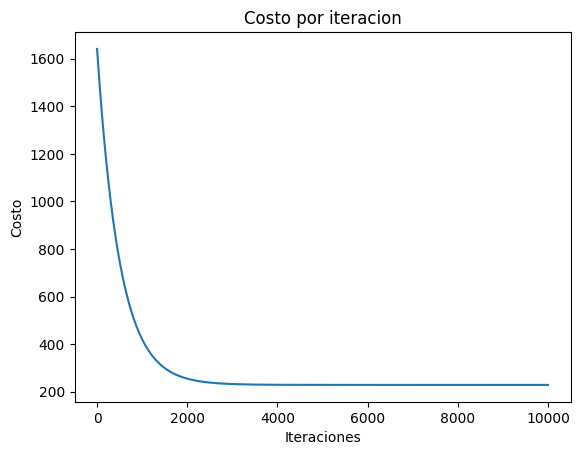

In [37]:
# inicializar theta y ejecutar el algoritmo de regresion lineal
theta = np.zeros(14)
alpha = 0.001
lambda_ = 0.01
num_iteraciones = 10000
theta, J_history = calcularDescensoGradientes(X, y, theta, alpha, num_iteraciones, lambda_)

print('Theta calculado:', theta)
print('Costo calculado:', J_history[-1])

# graficar la evolucion del costo
plt.plot(J_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo por iteracion')
plt.show()


Popularidad de la cancion 1: 55.128642107205174
Popularidad de la cancion 2: 48.535421188403284
Popularidad de la cancion 3: 47.994310436626044
Popularidad de la cancion 4: 41.830538896857774
Popularidad de la cancion 5: 36.51888366261154
Popularidad de la cancion 6: 30.712145932632097
Popularidad de la cancion 7: 24.600968179058388
Popularidad de la cancion 8: 20.82518006852605
Popularidad de la cancion 9: 14.714002314952339
Popularidad de la cancion 10: 10.527738504380125


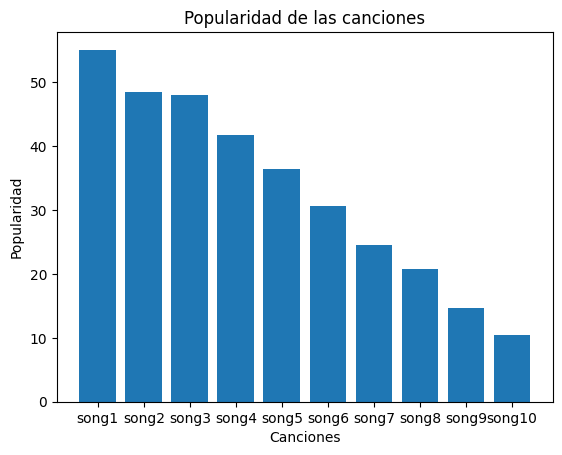

In [38]:
popularity1 = np.dot(song1, theta)
print('Popularidad de la cancion 1:', popularity1)

popularity2 = np.dot(song2, theta)
print('Popularidad de la cancion 2:', popularity2)

popularity3 = np.dot(song3, theta)
print('Popularidad de la cancion 3:', popularity3)

popularity4 = np.dot(song4, theta)
print('Popularidad de la cancion 4:', popularity4)

popularity5 = np.dot(song5, theta)
print('Popularidad de la cancion 5:', popularity5)

popularity6 = np.dot(song6, theta)
print('Popularidad de la cancion 6:', popularity6)

popularity7 = np.dot(song7, theta)
print('Popularidad de la cancion 7:', popularity7)

popularity8 = np.dot(song8, theta)
print('Popularidad de la cancion 8:', popularity8)

popularity9 = np.dot(song9, theta)
print('Popularidad de la cancion 9:', popularity9)

popularity10 = np.dot(song10, theta)
print('Popularidad de la cancion 10:', popularity10)

songs = ['song1', 'song2', 'song3', 'song4', 'song5', 'song6', 'song7', 'song8', 'song9', 'song10']
popularity = [popularity1, popularity2, popularity3, popularity4, popularity5, popularity6, popularity7, popularity8, popularity9, popularity10]
plt.bar(songs, popularity)
plt.xlabel('Canciones')
plt.ylabel('Popularidad')
plt.title('Popularidad de las canciones')
plt.show()